## Distribució dades PROCESSED 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from adjustText import adjust_text
import umap

In [2]:
# Llegir el CSV
df = pd.read_csv('/Users/carlabatlle/Documents/practiques/data/RNAseq_p_merged.csv')

# Configurar la primera columna com a index
df = df.set_index(df.columns[0])

# Restablir l'índex per treballar amb ell
data = df.reset_index()

# Separar condicions i valors d'expressió
df_values = df.iloc[:, 1:-1]  # Dades d'expressió (totes les columnes menys 'record_id' i 'Condició')
conditions = df.iloc[:, -1]    # Última columna (condició del pacient)
gene_ids = df.iloc[:, 0]       # Primera columna (ID del gen o pacient)
 
# Definir les columnes numèriques correctament (les de df_values)
columnes_numeriques = df_values.columns  

# Eliminar files on totes les columnes numèriques són NaN
df_filtered = df.dropna(how="all", subset=columnes_numeriques)



# 1. Dades processades 

In [3]:
df_filtered

,1,100,1000,10000,10001,10002,10003,100033411,100037417,10004,...,9980,9982,9984,9985,9986,999,9990,9991,9994,Condició
record_id,,,,,,,,,,,,,,,,,,,,,
R047,-0.244341,1.556418,4.669088,5.994466,3.587379,-2.302168,2.731587,NaN,0.058758,0.948392,...,5.135921,0.309101,5.145003,5.681473,3.749644,8.460886,3.876229,7.330101,2.829973,SA
R049,-1.063776,1.875849,2.570770,5.614705,3.861416,-2.102493,2.264753,NaN,0.043771,0.386279,...,4.595226,1.442957,5.341986,5.107826,4.155299,8.530386,3.961442,7.593826,3.435766,SA
R050,NaN,1.375911,4.367480,5.728950,3.727825,-3.178347,2.272526,NaN,0.532140,1.230714,...,4.336762,1.843685,5.229107,5.851199,4.056127,8.389783,3.626248,7.161331,2.126237,SA
R051,-1.358131,1.487415,3.040695,5.270685,4.230220,-2.019200,0.294598,NaN,0.177533,-0.164948,...,4.390042,2.185381,5.537388,4.457506,4.344945,8.789744,4.206138,7.480806,3.352260,SA
R054,NaN,1.648987,3.280177,5.057655,4.314976,-1.962376,1.405355,NaN,0.888633,1.305461,...,4.018346,0.375919,5.404018,4.595673,4.645042,7.956296,3.813134,7.465924,3.421090,Type2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
R419,0.676801,-0.884261,4.230512,6.647886,4.328625,-2.781352,1.785775,-2.241223,0.552365,0.996317,...,5.068997,NaN,4.858479,3.412465,3.681153,7.755343,4.411560,7.062876,4.063884,SA
R420,-2.213387,0.527712,4.764895,6.107280,3.170255,-1.506962,3.373551,NaN,-0.394937,0.457888,...,4.800592,-0.051611,5.203977,5.101805,4.141782,8.362505,4.249029,7.686372,3.456452,SA
R421,-0.982793,1.296399,3.700346,6.122578,3.233207,-0.671431,4.154906,NaN,-0.982793,1.672406,...,5.695419,NaN,4.722818,4.828709,4.198656,7.697577,4.099566,7.655025,3.223827,SA


## 1.1 Boxplot
first 10

Text(0, 0.5, 'Expression levels')

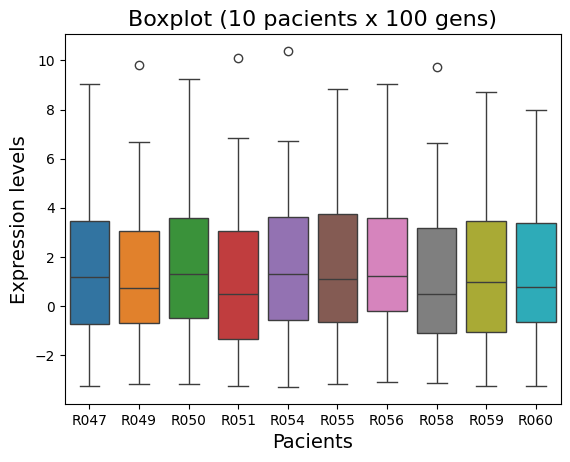

In [4]:
first_ten = df.iloc[:10, :100]
sns.boxplot(first_ten.T)
plt.title("Boxplot (10 pacients x 100 gens)", fontsize=16)
plt.xlabel("Pacients", fontsize=14)
plt.ylabel("Expression levels", fontsize=14)

## 1.2 Boxplot 10 sans vs 10 type II

In [5]:
df_filtered["Condició"] = conditions
df_sa = df_filtered[df_filtered["Condició"] == "SA"]  # Pacients sans
df_type2 = df_filtered[df_filtered["Condició"] == "Type2"]  # Pacients amb diabetis tipus 2

# Agafem primeres 10 de cada condició
df_sa_sample=df_sa.iloc[:10]
df_type2_sample=df_type2.iloc[:10]

# Concatenem en un mateix df les dos condicions = 20 pacients
df_combined = pd.concat([df_sa_sample, df_type2_sample], axis=0)
df_combined_reset = df_combined.reset_index()  # sense index record_id
gene_columns = df_combined_reset.columns[1:-1] # només les columnes de gens

# Filtrar les columnes que tenen NaN en tots els valors
df_combined_nan = df_combined.loc[:, ~df_combined.isna().all()]


df_combined

,1,100,1000,10000,10001,10002,10003,100033411,100037417,10004,...,9980,9982,9984,9985,9986,999,9990,9991,9994,Condició
record_id,,,,,,,,,,,,,,,,,,,,,
R047,-0.244341,1.556418,4.669088,5.994466,3.587379,-2.302168,2.731587,NaN,0.058758,0.948392,...,5.135921,0.309101,5.145003,5.681473,3.749644,8.460886,3.876229,7.330101,2.829973,SA
R049,-1.063776,1.875849,2.570770,5.614705,3.861416,-2.102493,2.264753,NaN,0.043771,0.386279,...,4.595226,1.442957,5.341986,5.107826,4.155299,8.530386,3.961442,7.593826,3.435766,SA
R050,NaN,1.375911,4.367480,5.728950,3.727825,-3.178347,2.272526,NaN,0.532140,1.230714,...,4.336762,1.843685,5.229107,5.851199,4.056127,8.389783,3.626248,7.161331,2.126237,SA
R051,-1.358131,1.487415,3.040695,5.270685,4.230220,-2.019200,0.294598,NaN,0.177533,-0.164948,...,4.390042,2.185381,5.537388,4.457506,4.344945,8.789744,4.206138,7.480806,3.352260,SA
R055,-0.331410,1.027760,5.106331,6.120232,3.759875,NaN,3.766485,NaN,-2.533569,1.411917,...,4.986892,0.261941,4.730508,5.312338,3.733130,8.359432,3.467091,7.369175,2.973613,SA
R056,-0.822736,1.783991,3.920705,5.833195,3.655620,-0.273967,3.040658,NaN,0.308295,1.305589,...,5.258659,-0.090514,4.824775,5.365864,3.884647,8.687777,3.990225,7.041533,2.154806,SA
R058,0.121793,1.045604,4.702926,5.991554,4.092911,NaN,2.577443,NaN,-1.702887,0.999390,...,3.933074,1.216943,5.211119,4.193832,3.870262,8.137167,4.506269,8.363260,4.342384,SA
R060,0.414077,0.541310,5.001995,6.395417,3.927346,NaN,3.208488,NaN,-1.417975,1.463348,...,4.275486,-1.734425,5.154083,4.297284,3.425265,7.412322,4.543627,8.375842,4.186791,SA
R061,-0.415108,1.262086,4.889469,5.965078,3.871463,NaN,3.259875,NaN,-1.722974,-0.124057,...,4.554166,2.246524,5.051388,4.828355,3.606137,8.541821,3.975061,7.988197,3.579410,SA


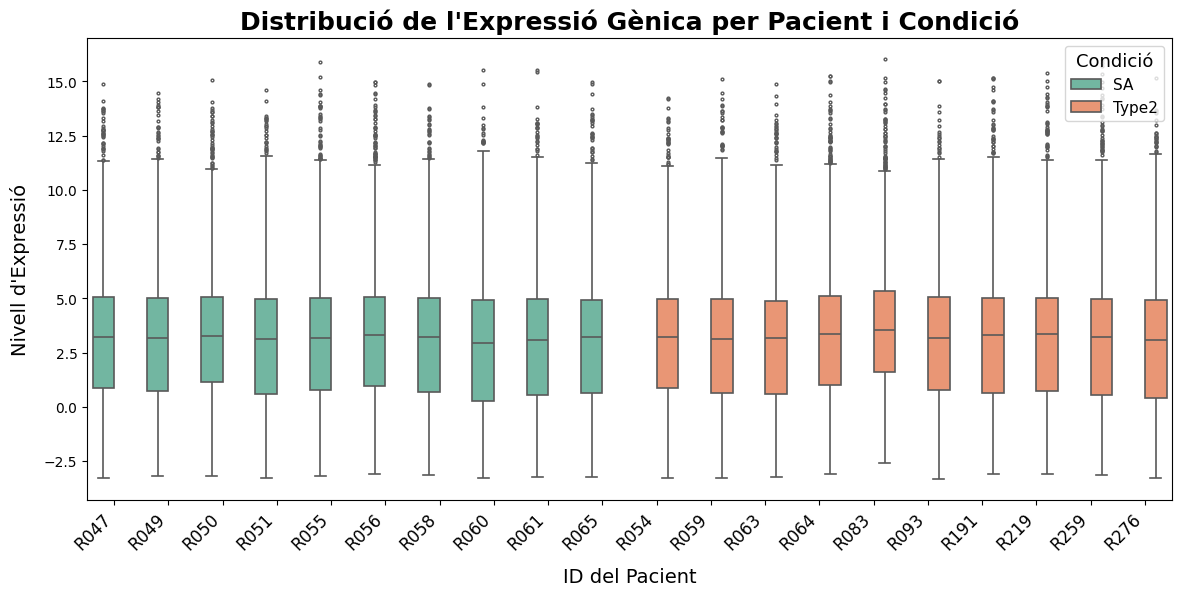

In [6]:
# Passar a format long
df_long = df_combined_reset.melt(id_vars=["record_id", "Condició"], var_name="Gene", value_name="Expression")

df_sa = df_long[df_long['Condició'] == 'SA']
df_type2 = df_long[df_long['Condició'] == 'Type2']

df_combined_sample = pd.concat([df_sa, df_type2])

# Boxplot

plt.figure(figsize=(14, 6))
sns.boxplot(
    data=df_combined_sample,
    x="record_id",
    y="Expression",
    hue="Condició",
    dodge=True,
    palette="Set2",  # Colors més suaus i diferenciats
    linewidth=1.2,  # Gruix de les línies del boxplot
    fliersize=2  # Mida dels outliers perquè no sobresurtin massa
)

plt.title("Distribució de l'Expressió Gènica per Pacient i Condició", fontsize=18, fontweight='bold')
plt.xlabel("ID del Pacient", fontsize=14, labelpad=10)
plt.ylabel("Nivell d'Expressió", fontsize=14, labelpad=10)

plt.xticks(rotation=45, ha="right", fontsize=12)  # Rotar els noms dels pacients
plt.legend(title="Condició", title_fontsize=13, fontsize=11, loc="upper right", frameon=True)

plt.show()


## 1.3 Histograma 

In [7]:
#Sa
r047 = df_combined_sample[df_combined_sample["record_id"] == "R047"]
r049 = df_combined_sample[df_combined_sample["record_id"] == "R049"]
r050 = df_combined_sample[df_combined_sample["record_id"] == "R050"]
r051 = df_combined_sample[df_combined_sample["record_id"] == "R051"]
r055 = df_combined_sample[df_combined_sample["record_id"] == "R055"]
r056 = df_combined_sample[df_combined_sample["record_id"] == "R056"]
r058 = df_combined_sample[df_combined_sample["record_id"] == "R058"]
r060 = df_combined_sample[df_combined_sample["record_id"] == "R060"]
r061 = df_combined_sample[df_combined_sample["record_id"] == "R061"]
r065 = df_combined_sample[df_combined_sample["record_id"] == "R065"]

#Type 2
r054 = df_combined_sample[df_combined_sample["record_id"] == "R054"]
r059 = df_combined_sample[df_combined_sample["record_id"] == "R059"]
r063 = df_combined_sample[df_combined_sample["record_id"] == "R063"]
r064 = df_combined_sample[df_combined_sample["record_id"] == "R064"]
r083 = df_combined_sample[df_combined_sample["record_id"] == "R083"]
r093 = df_combined_sample[df_combined_sample["record_id"] == "R093"]
r191 = df_combined_sample[df_combined_sample["record_id"] == "R191"]
r219 = df_combined_sample[df_combined_sample["record_id"] == "R219"]
r259 = df_combined_sample[df_combined_sample["record_id"] == "R259"]
r276 = df_combined_sample[df_combined_sample["record_id"] == "R276"]


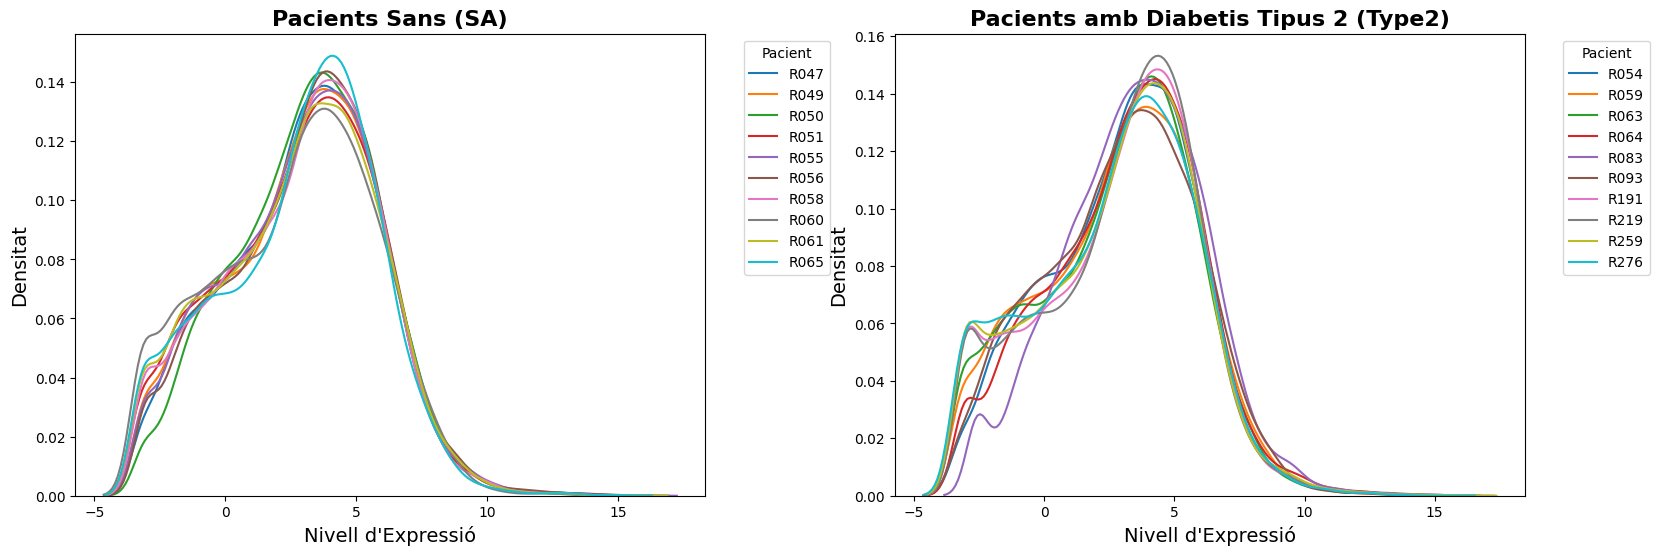

In [8]:
# Crear subplots amb dues columnes
fig, axes = plt.subplots(1, 2, figsize=(20, 6))

# Pacients sans (SA)
sns.kdeplot(r047["Expression"], label="R047", color="#1f77b4", ax=axes[0])  # Blau
sns.kdeplot(r049["Expression"], label="R049", color="#ff7f0e", ax=axes[0])  # Taronja
sns.kdeplot(r050["Expression"], label="R050", color="#2ca02c", ax=axes[0])  # Verd
sns.kdeplot(r051["Expression"], label="R051", color="#d62728", ax=axes[0])  # Vermell
sns.kdeplot(r055["Expression"], label="R055", color="#9467bd", ax=axes[0])  # Morat
sns.kdeplot(r056["Expression"], label="R056", color="#8c564b", ax=axes[0])  # Marró
sns.kdeplot(r058["Expression"], label="R058", color="#e377c2", ax=axes[0])  # Rosa
sns.kdeplot(r060["Expression"], label="R060", color="#7f7f7f", ax=axes[0])  # Gris
sns.kdeplot(r061["Expression"], label="R061", color="#bcbd22", ax=axes[0])  # Groc
sns.kdeplot(r065["Expression"], label="R065", color="#17becf", ax=axes[0])  # Cian

# Configuració del primer subplot
axes[0].legend(title="Pacient", bbox_to_anchor=(1.05, 1), loc='upper left')
axes[0].set_title("Pacients Sans (SA)", fontsize=16, fontweight="bold")
axes[0].set_xlabel("Nivell d'Expressió", fontsize=14)
axes[0].set_ylabel("Densitat", fontsize=14)

# Pacients amb diabetis tipus 2 (Type2)
sns.kdeplot(r054["Expression"], label="R054", color="#1f77b4", ax=axes[1])  # Blau
sns.kdeplot(r059["Expression"], label="R059", color="#ff7f0e", ax=axes[1])  # Taronja
sns.kdeplot(r063["Expression"], label="R063", color="#2ca02c", ax=axes[1])  # Verd
sns.kdeplot(r064["Expression"], label="R064", color="#d62728", ax=axes[1])  # Vermell
sns.kdeplot(r083["Expression"], label="R083", color="#9467bd", ax=axes[1])  # Morat
sns.kdeplot(r093["Expression"], label="R093", color="#8c564b", ax=axes[1])  # Marró
sns.kdeplot(r191["Expression"], label="R191", color="#e377c2", ax=axes[1])  # Rosa
sns.kdeplot(r219["Expression"], label="R219", color="#7f7f7f", ax=axes[1])  # Gris
sns.kdeplot(r259["Expression"], label="R259", color="#bcbd22", ax=axes[1])  # Groc
sns.kdeplot(r276["Expression"], label="R276", color="#17becf", ax=axes[1])  # Cian

# Configuració del segon subplot
axes[1].legend(title="Pacient", bbox_to_anchor=(1.05, 1), loc='upper left')
axes[1].set_title("Pacients amb Diabetis Tipus 2 (Type2)", fontsize=16, fontweight="bold")
axes[1].set_xlabel("Nivell d'Expressió", fontsize=14)
axes[1].set_ylabel("Densitat", fontsize=14)

plt.subplots_adjust(wspace=0.3, right=0.85)
plt.show()



/var/folders/b8/rdg06f9d2dq8b5jy2qvvln500000gn/T/ipykernel_3947/3902055418.py:22: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  integral = np.trapz(counts, bin_centers)  # Integral numèrica


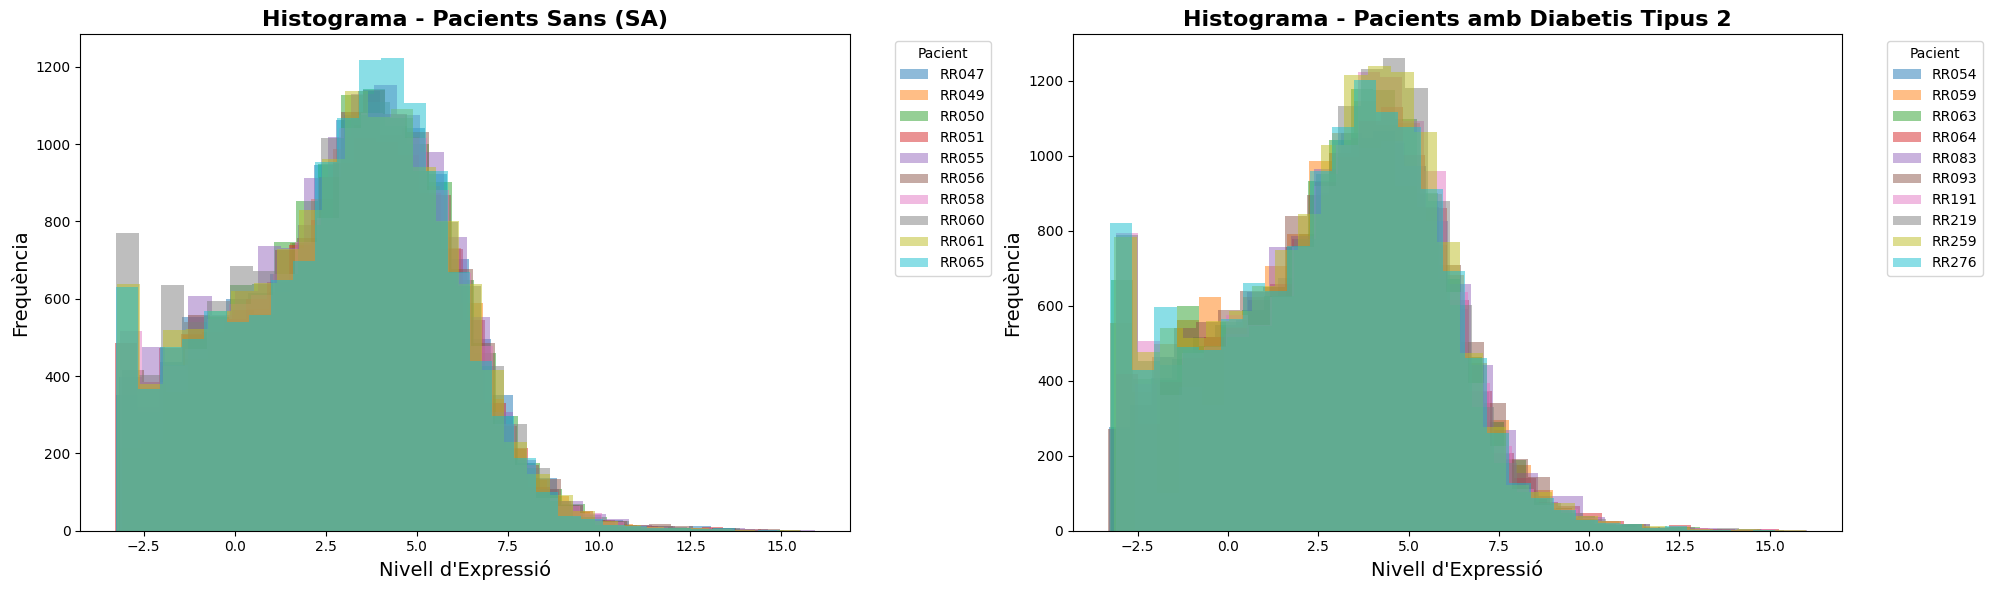

Integral de l'histograma per a pacients sans (SA):
RR047: 7728.29
RR049: 7393.30
RR050: 7698.46
RR051: 7355.87
RR055: 8102.69
RR056: 7650.41
RR058: 7494.02
RR060: 8161.15
RR061: 7977.67
RR065: 7881.54

Integral de l'histograma per a pacients amb diabetis tipus 2:
RR054: 7112.57
RR059: 8042.45
RR063: 7813.20
RR064: 7400.27
RR083: 7074.85
RR093: 7700.94
RR191: 7770.73
RR219: 7889.33
RR259: 8320.10
RR276: 8079.52


In [9]:
import matplotlib.pyplot as plt
import numpy as np

# Crear subplots per als dos grups
fig, axes = plt.subplots(1, 2, figsize=(20, 6))

# Definir colors
colors = ["#1f77b4", "#ff7f0e", "#2ca02c", "#d62728", "#9467bd",
          "#8c564b", "#e377c2", "#7f7f7f", "#bcbd22", "#17becf"]

# Funció per calcular la integral numèrica d'un histograma
def compute_histogram_integral(data, bins=30):
    # Eliminar NaNs i infinits
    data = data.dropna()
    data = data[np.isfinite(data)]
    
    if len(data) == 0:  # Evitar problemes amb llistes buides
        return None, None, 0  

    counts, bin_edges = np.histogram(data, bins=bins)
    bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2  # Centres dels bins
    integral = np.trapz(counts, bin_centers)  # Integral numèrica
    return counts, bin_edges, integral

# ---- PACIENTS SANS (SA) ----
pacients_sa = [r047, r049, r050, r051, r055, r056, r058, r060, r061, r065]
integrals_sa = {}

for i, pacient in enumerate(pacients_sa):
    counts, bin_edges, integral = compute_histogram_integral(pacient["Expression"])
    if counts is not None:
        axes[0].hist(pacient["Expression"].dropna(), bins=30, alpha=0.5, color=colors[i], label=f"R{pacient['record_id'].iloc[0]}")
        integrals_sa[f"R{pacient['record_id'].iloc[0]}"] = integral  # Guardem la integral

axes[0].legend(title="Pacient", bbox_to_anchor=(1.05, 1), loc='upper left')
axes[0].set_title("Histograma - Pacients Sans (SA)", fontsize=16, fontweight="bold")
axes[0].set_xlabel("Nivell d'Expressió", fontsize=14)
axes[0].set_ylabel("Frequència", fontsize=14)

# ---- PACIENTS AMB DIABETIS TIPUS 2 ----
pacients_t2 = [r054, r059, r063, r064, r083, r093, r191, r219, r259, r276]
integrals_t2 = {}

for i, pacient in enumerate(pacients_t2):
    counts, bin_edges, integral = compute_histogram_integral(pacient["Expression"])
    if counts is not None:
        axes[1].hist(pacient["Expression"].dropna(), bins=30, alpha=0.5, color=colors[i], label=f"R{pacient['record_id'].iloc[0]}")
        integrals_t2[f"R{pacient['record_id'].iloc[0]}"] = integral  # Guardem la integral

axes[1].legend(title="Pacient", bbox_to_anchor=(1.05, 1), loc='upper left')
axes[1].set_title("Histograma - Pacients amb Diabetis Tipus 2", fontsize=16, fontweight="bold")
axes[1].set_xlabel("Nivell d'Expressió", fontsize=14)
axes[1].set_ylabel("Frequència", fontsize=14)

plt.tight_layout()
plt.show()

# Mostrar resultats de les integrals
print("Integral de l'histograma per a pacients sans (SA):")
for pacient, integral in integrals_sa.items():
    print(f"{pacient}: {integral:.2f}")

print("\nIntegral de l'histograma per a pacients amb diabetis tipus 2:")
for pacient, integral in integrals_t2.items():
    print(f"{pacient}: {integral:.2f}")


## 1.4 PCA

In [10]:
# Extraure les dades d'expressió
expression = df_combined_reset.drop(columns=["Condició", "record_id"])

# Eliminar NaNs i infinits
expression = expression.dropna(axis=1)
expression = expression.loc[:, np.isfinite(expression).all(axis=0)]  # Eliminar columnes amb valors infinits
# Guardar la condició
condition = df_combined_reset["Condició"]

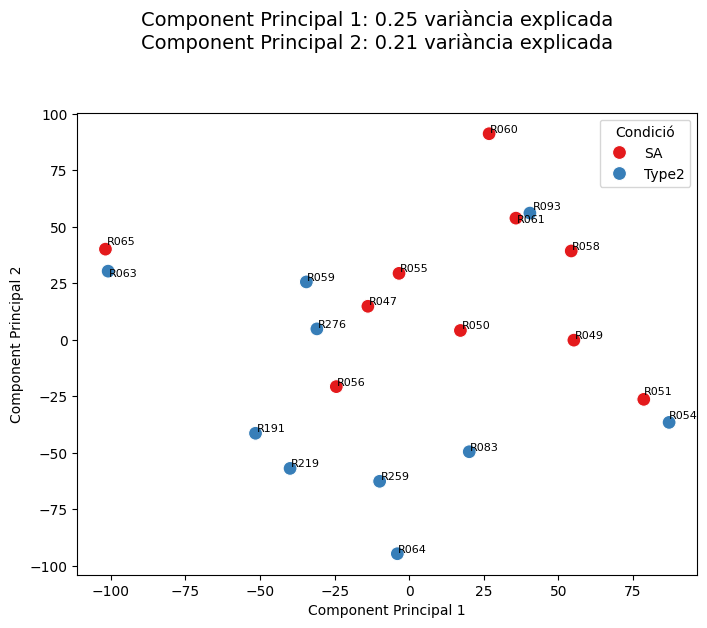

In [26]:


# Normalització de les dades
scaler = StandardScaler()
X_scaled = scaler.fit_transform(expression)

# PCA amb 2 components principals
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Crear dataframe amb els resultats de PCA
df_pca = pd.DataFrame(data=X_pca, columns=["Component Principal 1", "Component Principal 2"])
df_pca["Condició"] = condition
df_pca["record_id"] = df_combined_reset["record_id"]

# Afegir les variàncies explicades
explained_variance = pca.explained_variance_ratio_

# Crear el gràfic
plt.figure(figsize=(8, 6))  # Aumentem la mida del gràfic per tenir espai per al text

# Graficar el PCA
sns.scatterplot(x="Component Principal 1", y="Component Principal 2", hue="Condició", data=df_pca, s=100, palette="Set1")

# Afegir la variància explicada a sobre del gràfic
plt.suptitle(f"Component Principal 1: {explained_variance[0]:.2f} variància explicada\n"
             f"Component Principal 2: {explained_variance[1]:.2f} variància explicada", 
             fontsize=14, ha='center', va='bottom')

# Afegir etiquetes als punts
texts = []
for i in range(df_pca.shape[0]):
    text = plt.text(df_pca["Component Principal 1"].iloc[i], 
                    df_pca["Component Principal 2"].iloc[i], 
                    df_pca["record_id"].iloc[i], 
                    fontsize=8)
    texts.append(text)

# Ajustar les etiquetes
adjust_text(texts, arrowprops=dict(arrowstyle="->", color='black'))

# Mostrar el gràfic
plt.show()


## 2. Dades Transformades 

In [18]:

from sklearn.preprocessing import QuantileTransformer

condition_column = df_filtered['Condició']
record_id_column = df_filtered.index

# Filtrar només les columnes numèriques per la normalització
df_filtered_numeric = df_filtered.drop(columns=['Condició'])
df_filtered_numeric = df_filtered_numeric.select_dtypes(include=[np.number])

# Aplicar la normalització per quantils
scaler = QuantileTransformer(output_distribution='uniform', random_state=42)
df_normalized = pd.DataFrame(scaler.fit_transform(df_filtered_numeric), columns=df_filtered_numeric.columns)

df_normalized['Condició'] = condition_column
df_normalized['record_id'] = record_id_column

df_normalized.set_index('record_id', inplace=True)



/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/preprocessing/_data.py:2829: UserWarning: n_quantiles (1000) is greater than the total number of samples (117). n_quantiles is set to n_samples.
  warnings.warn(


In [19]:
df_normalized

,1,100,1000,10000,10001,10002,10003,100033411,100037417,10004,...,9980,9982,9984,9985,9986,999,9990,9991,9994,Condició
record_id,,,,,,,,,,,,,,,,,,,,,
R047,0.560099,0.758621,0.741379,0.560345,0.534483,0.224674,0.603448,NaN,0.649633,0.431034,...,0.646552,0.571181,0.577586,0.870690,0.387931,0.655172,0.310345,0.405172,0.224138,NaN
R049,0.254640,0.879310,0.025862,0.232759,0.767241,0.293184,0.353448,NaN,0.642148,0.181034,...,0.267241,0.811652,0.750000,0.500000,0.750000,0.706897,0.353448,0.612069,0.603448,NaN
R050,NaN,0.603448,0.534483,0.293103,0.637931,0.024726,0.362069,NaN,0.842737,0.568966,...,0.120690,0.914288,0.672414,0.922414,0.672414,0.612069,0.137931,0.241379,0.034483,NaN
R051,0.172414,0.655172,0.068966,0.068966,0.913793,0.336561,0.000000,NaN,0.723876,0.086207,...,0.146552,0.955371,0.905172,0.120690,0.896552,0.844828,0.603448,0.525862,0.551724,NaN
R054,NaN,0.801724,0.103448,0.025862,0.939655,0.350783,0.129310,NaN,0.922347,0.620690,...,0.025862,0.595876,0.836207,0.215517,0.965517,0.293103,0.241379,0.508621,0.594828,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
R419,0.955015,0.008621,0.474138,0.965517,0.974138,0.111270,0.267241,0.206076,0.858136,0.465517,...,0.568966,NaN,0.310345,0.000000,0.301724,0.155172,0.689655,0.172414,0.896552,NaN
R420,0.019333,0.250000,0.784483,0.629310,0.094828,0.638110,0.818966,NaN,0.543901,0.224138,...,0.431034,0.504879,0.629310,0.482759,0.732759,0.560345,0.612069,0.663793,0.629310,NaN
R421,0.293648,0.560345,0.267241,0.663793,0.155172,0.893032,0.965517,NaN,0.364781,0.862069,...,0.922414,NaN,0.172414,0.284483,0.810345,0.120690,0.525862,0.655172,0.482759,NaN


## 2.1 Boxplot

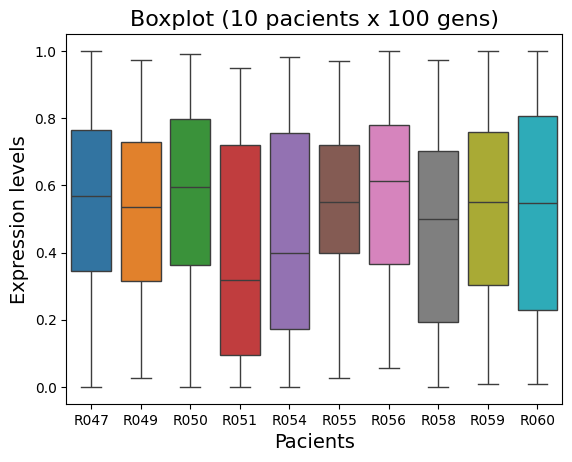

In [20]:
first_ten = df_normalized.iloc[:10, :100]
sns.boxplot(first_ten.T)
plt.title("Boxplot (10 pacients x 100 gens)", fontsize=16)
plt.xlabel("Pacients", fontsize=14)
plt.ylabel("Expression levels", fontsize=14)
plt.show()


## 2.2 Boxplot 10 vs 10

In [21]:
df_normalized["Condició"] = conditions
df_sa_n = df_normalized[df_normalized["Condició"] == "SA"]
df_type2_n = df_normalized[df_normalized["Condició"] == "Type2"]

df_sa_sample_n = df_sa_n.iloc[:10]
df_type2_sample_n = df_type2_n.iloc[:10]

df_combined_n = pd.concat([df_sa_sample_n, df_type2_sample_n], axis=0)
df_combined_reset_n = df_combined_n.reset_index()
gene_columns_n = df_combined_reset_n.columns[1:-1]

df_combined_nan_n = df_combined_n.loc[:, ~df_combined_n.isna().all()]



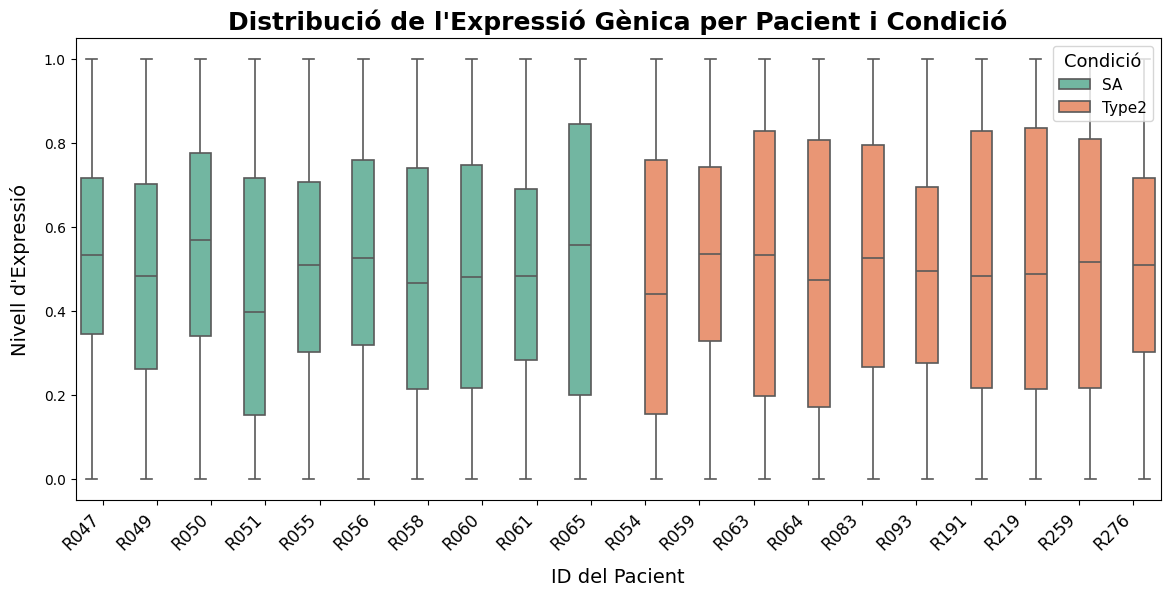

In [22]:
df_long_n = df_combined_reset_n.melt(id_vars=["record_id", "Condició"], var_name="Gene", value_name="Expression")

df_sa_n = df_long_n[df_long_n['Condició'] == 'SA']
df_type2_n = df_long_n[df_long_n['Condició'] == 'Type2']

df_combined_sample_n = pd.concat([df_sa_n, df_type2_n])

plt.figure(figsize=(14, 6))
sns.boxplot(
    data=df_combined_sample_n,
    x="record_id",
    y="Expression",
    hue="Condició",
    dodge=True,
    palette="Set2",
    linewidth=1.2,
    fliersize=2
)

plt.title("Distribució de l'Expressió Gènica per Pacient i Condició", fontsize=18, fontweight='bold')
plt.xlabel("ID del Pacient", fontsize=14, labelpad=10)
plt.ylabel("Nivell d'Expressió", fontsize=14, labelpad=10)

plt.xticks(rotation=45, ha="right", fontsize=12)
plt.legend(title="Condició", title_fontsize=13, fontsize=11, loc="upper right", frameon=True)

plt.show()
